In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Display Training & Test data (top & bottom five datasets)

In [4]:
#load the csv file
train_data = pd.read_csv('train_data_preprocessed_v2.csv')
test_data = pd.read_csv('test_data_preprocessed_v2.csv')

In [5]:
train_data.shape

(36168, 48)

In [6]:
test_data.shape

(9043, 48)

In [7]:
train_data.head()

,age,day,housing_no,housing_yes,loan_no,loan_yes,marital_divorced,marital_married,marital_single,default_no,...,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,balance_log,pdays_log,duration_log,campaign_log,previous_log,y
0,42,29,0,1,0,1,1,0,0,1,...,0,0,1,0,-0.645275,-0.454071,-1.728912,4.961712,-0.420772,0
1,50,15,0,1,1,0,0,1,0,1,...,0,0,1,0,-0.538652,-0.454071,0.762074,-0.173538,-0.420772,0
2,47,5,0,1,1,0,0,1,0,1,...,0,0,1,0,-0.369329,-0.454071,-0.972209,2.939376,-0.420772,0
3,39,16,0,1,1,0,1,0,0,1,...,0,0,1,0,-0.077591,-0.454071,-1.019112,-0.802554,-0.420772,0
4,30,30,1,0,1,0,0,0,1,1,...,0,0,1,0,-0.393144,-0.454071,0.429922,-0.173538,-0.420772,1


In [8]:
test_data.head()

,age,day,housing_no,housing_yes,loan_no,loan_yes,marital_divorced,marital_married,marital_single,default_no,...,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,balance_log,pdays_log,duration_log,campaign_log,previous_log,y
0,48,14,0,1,1,0,0,1,0,1,...,0,0,1,0,-0.353943,-0.464901,0.033731,-0.811596,-0.435061,0
1,31,22,1,0,1,0,0,0,1,1,...,0,0,1,0,3.367438,-0.464901,-0.425208,-0.170094,-0.435061,0
2,45,9,0,1,1,0,0,1,0,1,...,0,0,1,0,-0.112356,-0.464901,-0.002151,-0.811596,-0.435061,0
3,58,20,1,0,1,0,0,1,0,1,...,0,0,1,0,0.064959,-0.464901,-1.512344,0.322148,-0.435061,0
4,35,21,1,0,1,0,0,0,1,1,...,0,0,1,0,1.839344,-0.464901,2.413680,-0.170094,-0.435061,1


In [9]:
#creating X,Y train and test data
x_train = train_data[train_data.columns[:-1]]
y_train = train_data[train_data.columns[-1]]
x_test = test_data[test_data.columns[:-1]]
y_test = test_data[test_data.columns[-1]]

In [10]:
### Checking Training Data and Testing Data dimensions
count_train = np.unique(y_train, return_counts=True)  # np.unique: numpy, find the unique elements of an array
count_test = np.unique(y_test, return_counts=True)

## DTs for Classification

In [11]:
from sklearn import tree
from sklearn import metrics

In [12]:
clf = tree.DecisionTreeClassifier()

clf = clf.fit(x_train, y_train)

In [13]:
y_pred = clf.predict(x_test)
print("Accuracy of the Decision Tree with processed Data:",metrics.accuracy_score(y_test, y_pred))

Accuracy of the Decision Tree with processed Data: 0.8773637067344907


## Hyperparameter Tuning
### Next we try to tune the maximum depth of the tree to decide the optimal maximum depth of the tree that gives the highest accuracy

In [14]:
Accu =[]  # This will store accuracy for different depth, [] define an empty list
for k in range(1,20): # k is depth of tree, starting from 1 to 10
    clf = tree.DecisionTreeClassifier(max_depth = k)
    # Train Decision Tree Classifer
    clf = clf.fit(x_train,y_train)
    #Predict the response for test dataset
    y_pred = clf.predict(x_test)
    accuracy_k =  metrics.accuracy_score(y_test, y_pred)
    Accu.append(accuracy_k) 
    print("Dept=", k)
    print("Accuracy:\n",accuracy_k)
    print("Confusion Matrix:", metrics.confusion_matrix(y_test, y_pred))
    print("\n")    

Dept= 1
Accuracy:
 0.8830034280659074
Confusion Matrix: [[7985    0]
 [1058    0]]


Dept= 2
Accuracy:
 0.8866526595156474
Confusion Matrix: [[7559  426]
 [ 599  459]]


Dept= 3
Accuracy:
 0.8969368572376424
Confusion Matrix: [[7795  190]
 [ 742  316]]


Dept= 4
Accuracy:
 0.900807254229791
Confusion Matrix: [[7768  217]
 [ 680  378]]


Dept= 5
Accuracy:
 0.899037929890523
Confusion Matrix: [[7718  267]
 [ 646  412]]


Dept= 6
Accuracy:
 0.8979321021784806
Confusion Matrix: [[7688  297]
 [ 626  432]]


Dept= 7
Accuracy:
 0.8984850160345018
Confusion Matrix: [[7715  270]
 [ 648  410]]


Dept= 8
Accuracy:
 0.898595598805706
Confusion Matrix: [[7745  240]
 [ 677  381]]


Dept= 9
Accuracy:
 0.8991485126617274
Confusion Matrix: [[7706  279]
 [ 633  425]]


Dept= 10
Accuracy:
 0.8983744332632976
Confusion Matrix: [[7700  285]
 [ 634  424]]


Dept= 11
Accuracy:
 0.8958310295255999
Confusion Matrix: [[7700  285]
 [ 657  401]]


Dept= 12
Accuracy:
 0.8972686055512551
Confusion Matrix: [[7683  3

In [15]:
# List of accuracy from max_depth = 1 to 20
Accu

[0.8830034280659074,
 0.8866526595156474,
 0.8969368572376424,
 0.900807254229791,
 0.899037929890523,
 0.8979321021784806,
 0.8984850160345018,
 0.898595598805706,
 0.8991485126617274,
 0.8983744332632976,
 0.8958310295255999,
 0.8972686055512551,
 0.8946146190423532,
 0.8954992812119872,
 0.8942828707287405,
 0.8896383943381622,
 0.8935087913303107,
 0.8901913081941834,
 0.8838880902355413]

Text(0, 0.5, 'Accuracies')

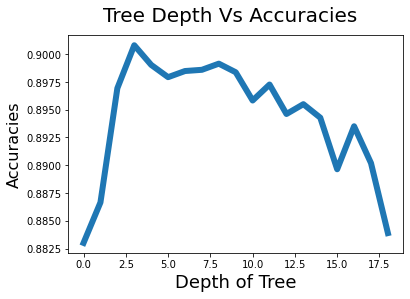

In [16]:
# Plot the relationship graphs
fig = plt.figure()
plt.plot(Accu, linewidth=6)
fig.suptitle('Tree Depth Vs Accuracies', fontsize=20)
plt.xlabel('Depth of Tree', fontsize=18)
plt.ylabel('Accuracies', fontsize=16)

In [17]:
#Maximum accuracy
print('Maximum depth value with the highest accuracy: ',1 + Accu.index(max(Accu)))
print('Maximum Accuracy:',"%.4f" % max(Accu))

Maximum depth value with the highest accuracy:  4
Maximum Accuracy: 0.9008


In [18]:
# Final Model
clf = tree.DecisionTreeClassifier(max_depth = 1 + Accu.index(max(Accu)))

clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

## Model Evaluation

In [19]:
#Plot Tree
fig, ax = plt.subplots(figsize=(200, 200))
tree.plot_tree(clf, fontsize=60)
plt.show()

### Training Performance

In [20]:
# Cross Validation Method - 10 folds validation
from sklearn.model_selection import cross_val_score
 
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
 
print ("OOB_SCORE=", "%.4f" % max(Accu))  # keep 4 decimal placce

cv_score = cross_val_score(clf, x_train, y_train, cv=10)
print(cv_score)
print ("Ten-fold Cross Validation Score=", "%.4f" % np.mean(cv_score)) 
#average of 10 iterations

OOB_SCORE= 0.9008
[0.90 0.90 0.90 0.90 0.90 0.90 0.90 0.90 0.90 0.90]
Ten-fold Cross Validation Score= 0.9008


### Testing Performance

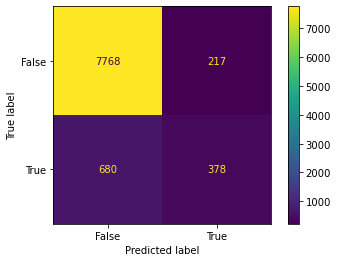

In [21]:
#Confusion Metrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [28]:
# Metrics evaluation
from sklearn.metrics import classification_report, confusion_matrix
print("Accuracy of the Decision Tree with Max_Depth = %i: %f" % (1 + Accu.index(max(Accu)),max(Accu)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of the Decision Tree with Max_Depth = 4: 0.900807
[[7768  217]
 [ 680  378]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.64      0.36      0.46      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.67      0.70      9043
weighted avg       0.89      0.90      0.89      9043

